In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
customer_data = pd.read_csv("mall_customers_synthetic.csv")

In [3]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,41,29.6,29
1,2,Female,69,50.3,27
2,3,Female,28,85.3,17
3,4,Female,66,45.8,29
4,5,Male,25,68.9,40


In [4]:
customer_data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
x = customer_data.iloc[:,[3,4]].values 

In [7]:
x[:10]

array([[29.6, 29. ],
       [50.3, 27. ],
       [85.3, 17. ],
       [45.8, 29. ],
       [68.9, 40. ],
       [75.5, 38. ],
       [41.5, 40. ],
       [58.8, 43. ],
       [15. , 15. ],
       [39.5, 48. ]])

In [9]:
##Choosing the number of clusters
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

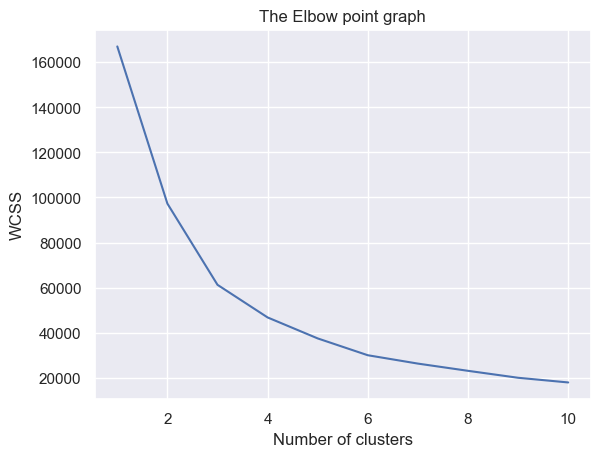

In [10]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title("The Elbow point graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [12]:
kmeans = KMeans(n_clusters = 5, init='k-means++', random_state=42)

#return a label for each datapoint based on their cluster
Y = kmeans.fit_predict(x)
print(Y)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[3 3 1 3 0 1 3 0 3 3 0 4 1 4 0 1 2 4 1 1 4 1 1 3 0 3 0 0 1 3 1 3 4 2 0 3 0
 0 0 1 1 3 1 1 1 1 3 4 0 2 0 0 1 3 0 0 3 1 1 2 2 4 0 4 0 1 1 1 3 1 3 3 1 2
 1 0 0 4 1 3 2 4 4 3 1 3 4 0 0 3 4 0 3 3 3 3 1 2 1 0 1 3 0 1 1 3 1 2 1 2 1
 3 2 0 0 3 0 2 2 2 1 4 2 1 1 3 4 4 3 4 3 1 1 2 1 4 3 2 3 2 1 4 3 1 4 0 3 4
 0 4 4 2 3 4 0 1 1 4 3 0 2 4 1 1 1 0 1 2 4 2 1 2 3 2 1 3 4 3 3 0 0 0 2 3 3
 1 1 4 3 0 4 2 1 3 4 3 0 2 4 0]


**Visualizing all the clusters**

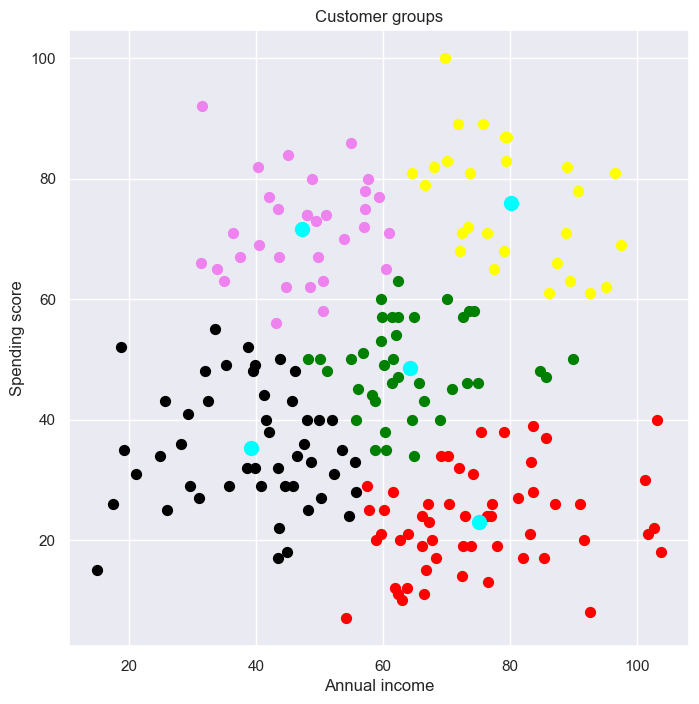

In [13]:
plt.figure(figsize= (8,8))
plt.scatter(x[Y==0,0], x[Y==0,1], s=50, c="green", label = "Cluster 1")
plt.scatter(x[Y==1,0], x[Y==1,1], s=50, c="red", label = "Cluster 2")
plt.scatter(x[Y==2,0], x[Y==2,1], s=50, c="yellow", label = "Cluster 3")
plt.scatter(x[Y==3,0], x[Y==3,1], s=50, c="black", label = "Cluster 4")
plt.scatter(x[Y==4,0], x[Y==4,1], s=50, c="violet", label = "Cluster 5")

##plt the centroid
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c='cyan', label='Centroid')
plt.title("Customer groups")
plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.show()